# Handling Missing Data

This notebook demonstrates the process of analyzing and treating missing values in a dataset. We classify the missingness into MCAR, MAR, or MNAR and then treat them accordingly.

## Load the Dataset

In [2]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analyze Missing Values

First, let's check which columns have missing values and how many missing values there are in each column.

In [3]:
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data

Age         177
Cabin       687
Embarked      2
dtype: int64

## Visualize Missingness for Age

For the `Age` column, we'll visually compare the proportion of passengers with known ages versus those with missing ages across other variables. This will help us infer if the missingness in the `Age` column is related to these variables or not.

C:\Users\WARRIOR\AppData\Local\Temp\ipykernel_17040\3804575762.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Age'].notnull()][col], ax=axes[1, i], label='Not Missing Age', shade=True)
C:\Users\WARRIOR\AppData\Local\Temp\ipykernel_17040\3804575762.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Age'].isnull()][col], ax=axes[1, i], label='Missing Age', shade=True)
C:\Users\WARRIOR\AppData\Local\Temp\ipykernel_17040\3804575762.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Age'].notnull()][col], ax=axes[1, i], label='Not Missing Age', shade=True)
C:\Users\WARRIOR\AppData\Lo

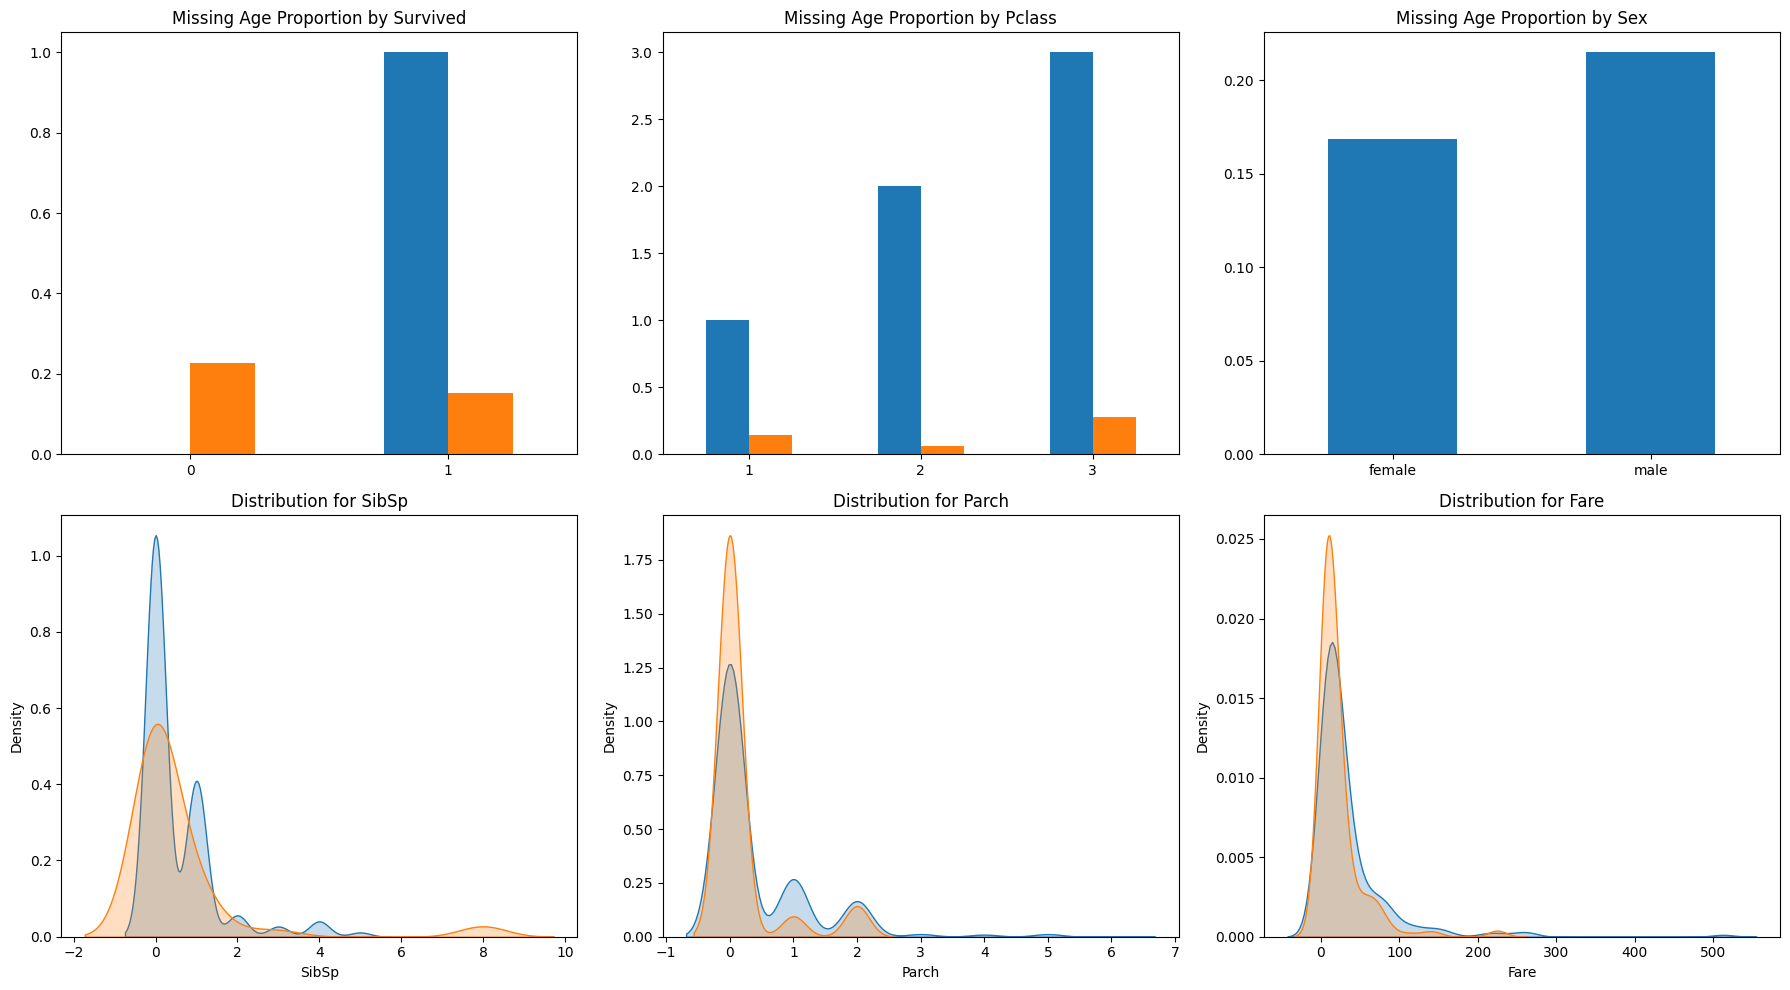

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Define which columns are categorical vs. numeric
categorical_cols = ['Survived', 'Pclass', 'Sex']
numeric_cols = ['SibSp', 'Parch', 'Fare']

# Plot categorical columns using stacked bar plots
for i, col in enumerate(categorical_cols):
    temp = data.groupby(col)['Age'].apply(lambda x: x.isnull().mean()).reset_index()
    temp.columns = [col, 'Missing Proportion']
    temp.plot(kind='bar', ax=axes[0, i], legend=False)
    axes[0, i].set_title(f'Missing Age Proportion by {col}')
    axes[0, i].set_xticklabels(temp[col], rotation=0)

# Plot numeric columns
for i, col in enumerate(numeric_cols):
    sns.kdeplot(data[data['Age'].notnull()][col], ax=axes[1, i], label='Not Missing Age', shade=True)
    sns.kdeplot(data[data['Age'].isnull()][col], ax=axes[1, i], label='Missing Age', shade=True)
    axes[1, i].set_title(f'Distribution for {col}')

# Adjust the layout
plt.tight_layout()
plt.show()


## Visualize Missingness for Cabin

For the `Cabin` column, we'll check the proportion of missing values by `Pclass`, as the cabin might be related to the class of the passenger.

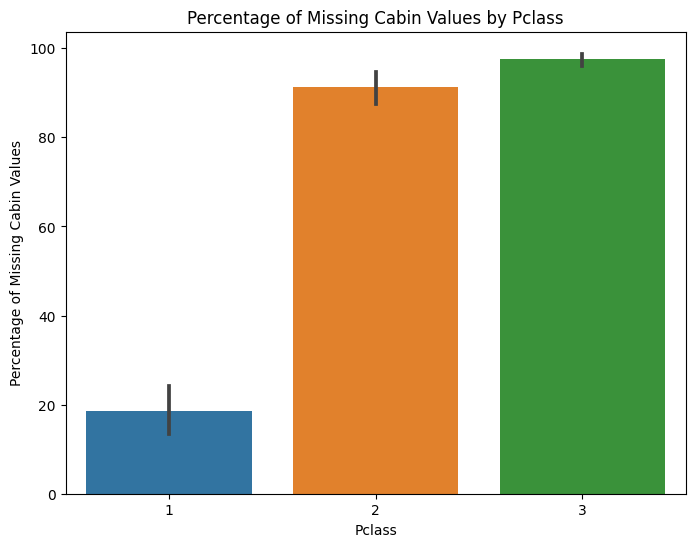

In [4]:

plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y=data['Cabin'].isnull().astype(int), data=data, estimator=lambda x: sum(x)*100.0/len(x))
plt.ylabel('Percentage of Missing Cabin Values')
plt.title('Percentage of Missing Cabin Values by Pclass')
plt.show()


## Treat Missing Values

Now, we'll treat the missing values based on the inferred type of missingness:

In [5]:

# MCAR: Simple imputation for 'Embarked' using mode
mode_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(mode_embarked, inplace=True)

# MAR: Median imputation for 'Age'
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)

# MNAR: Assign a new category 'Unknown' for missing 'Cabin' values
data['Cabin'].fillna('Unknown', inplace=True)

# Check if there are any missing values left
remaining_missing = data.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]
remaining_missing


Series([], dtype: int64)